In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_analisis = pd.read_excel("df_procesado.xlsx")

In [6]:
corr_pearson = df_analisis.drop(["Código NIF"],axis = 1).corr(method="pearson")
corr_spearman = df_analisis.drop(["Código NIF"],axis = 1).corr(method="spearman")

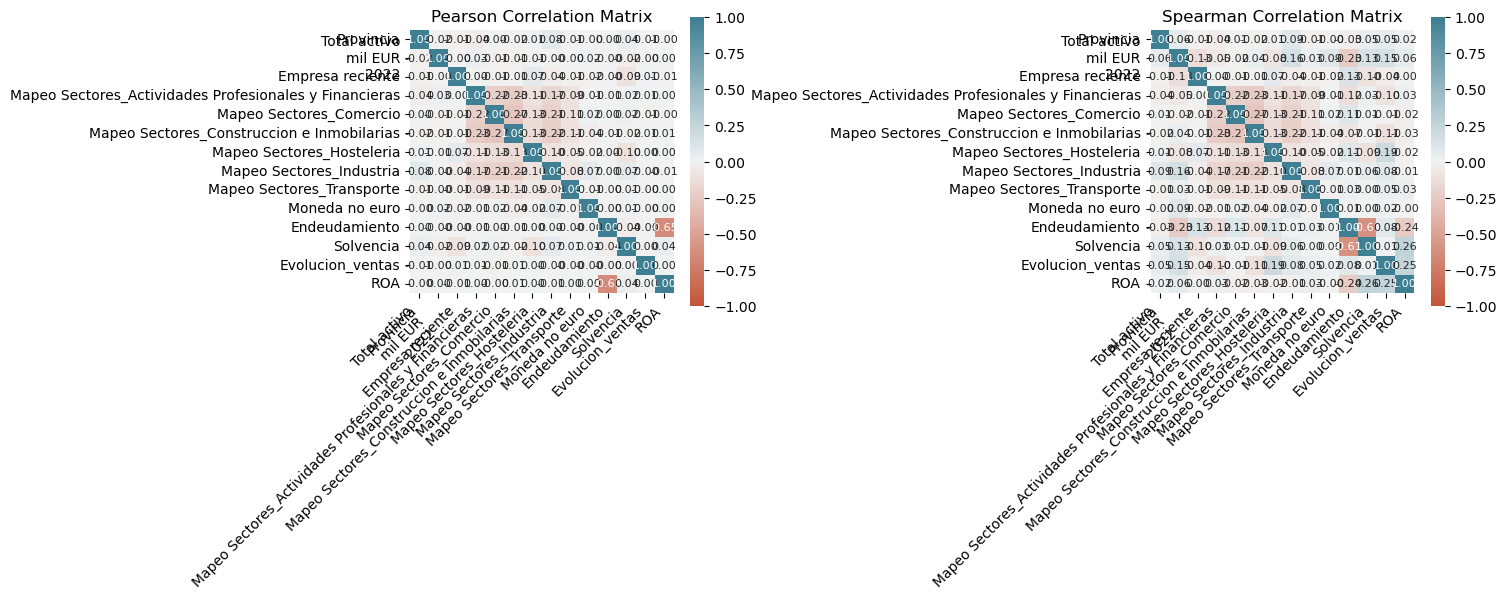

In [7]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_pearson, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax[0], annot=True, fmt=".2f", annot_kws={"size": 8})
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[0].set_title("Pearson Correlation Matrix")

sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True, ax=ax[1], fmt=".2f", annot_kws={"size": 8})
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[1].set_title("Spearman Correlation Matrix");

plt.tight_layout()

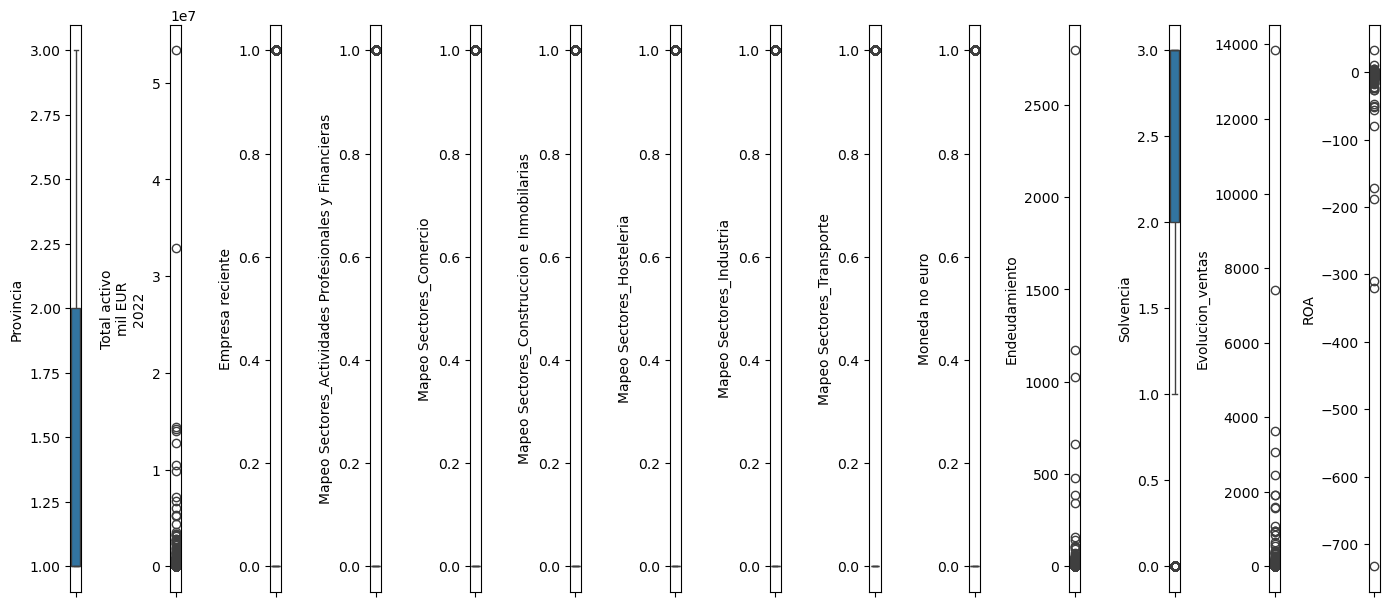

In [8]:
l = df_analisis.drop(["Código NIF"],axis = 1).columns.values
number_of_columns = len(l)
plt.figure(figsize=(number_of_columns,12))
for i in range(0,len(l)):
    plt.subplot(2,number_of_columns,i+1)
    sns.boxplot(df_analisis[l[i]])
    plt.ylabel(l[i])
    plt.tight_layout()